In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('modeling.xlsx')
data

,ID,出生年,性别,民族,Unnamed: 4,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,...,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸
0,10001.0,1983,2,1,NaN,4,1,9,3.0,NaN,...,92.0,98.0,62.0,70.0,3.79,4.61,1.59,1.88,0.91,210.4
1,10002.0,1994,2,1,NaN,3,1,13,3.0,NaN,...,88.0,104.0,70.0,80.0,4.24,4.59,1.59,2.17,0.81,270.6
2,10003.0,1976,1,1,NaN,4,2,4,1.0,16.0,...,95.0,104.0,70.0,80.0,4.84,4.13,1.33,2.92,1.59,298.2
3,10009.0,1962,1,1,NaN,4,2,12,3.0,NaN,...,92.0,92.0,62.0,72.0,4.80,4.86,1.39,2.97,0.74,412.3
4,10005.0,1968,1,1,NaN,4,2,9,1.0,20.0,...,97.0,106.0,70.0,70.0,5.10,4.41,1.37,3.15,1.87,350.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,NaN,1974,2,1,NaN,4,2,10,3.0,NaN,...,90.5,90.0,60.0,72.0,4.48,4.61,1.35,2.77,0.56,214.9
7831,NaN,1945,2,1,NaN,2,2,10,3.0,NaN,...,99.0,148.0,60.0,81.0,5.74,5.20,1.24,3.91,0.83,209.8
7832,NaN,1980,1,1,NaN,3,2,9,1.0,17.0,...,92.0,98.0,60.0,72.0,3.92,4.55,0.93,2.46,1.62,227.9
7833,NaN,1965,2,1,NaN,3,2,10,3.0,NaN,...,92.0,108.0,68.0,64.0,4.40,4.54,1.33,2.69,0.64,230.2


In [79]:
target_colums=[  52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 
               62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 
               79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 
               96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,110,111,112,
              113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131]
data1=data[data.columns[target_colums]]
data1

,是否吃大米,食用大米的频率,大米平均每次食用量,是否吃小麦面粉,食用小麦面粉的频率,小麦面粉平均每次食用量,是否吃杂粮,食用杂粮的频率,杂粮平均每次食用量,是否吃薯类,...,糕点平均每次食用量,是否吃水果,食用水果的频率,水果平均每次食用量,是否吃果汁饮料,食用果汁饮料的频率,果汁饮料平均每次食用量,是否吃其他饮料,食用其他饮料的频率,其他饮料平均每次食用量
0,1.0,1.0,1.0,1.0,NaN,2.00,1.0,NaN,2.0,1.0,...,NaN,1.0,2.0,10.0,2.0,NaN,NaN,2.0,NaN,NaN
1,1.0,2.0,1.5,1.0,NaN,1.50,1.0,NaN,1.0,1.0,...,1.5,1.0,2.0,3.0,1.0,NaN,2.0,1.0,1.0,2.0
2,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,...,2.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,NaN,1.0
3,1.0,2.0,3.0,1.0,NaN,3.00,1.0,NaN,5.0,1.0,...,2.0,1.0,1.0,5.0,1.0,NaN,2.0,1.0,NaN,2.0
4,1.0,1.0,1.5,1.0,NaN,2.00,2.0,NaN,NaN,2.0,...,NaN,1.0,NaN,1.0,1.0,1.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1.0,2.0,1.5,1.0,NaN,1.50,1.0,NaN,1.0,1.0,...,2.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0
7831,1.0,3.0,2.0,1.0,NaN,2.00,2.0,NaN,NaN,1.0,...,3.0,1.0,2.0,4.0,2.0,NaN,NaN,2.0,NaN,NaN
7832,1.0,2.0,3.0,2.0,NaN,NaN,1.0,NaN,2.0,1.0,...,NaN,1.0,2.0,3.0,1.0,NaN,2.0,2.0,NaN,NaN
7833,1.0,2.0,1.0,1.0,NaN,0.75,1.0,NaN,2.0,1.0,...,2.0,1.0,2.0,5.0,2.0,NaN,NaN,2.0,NaN,NaN


In [80]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


In [81]:
data2=missing_percentage(data1)

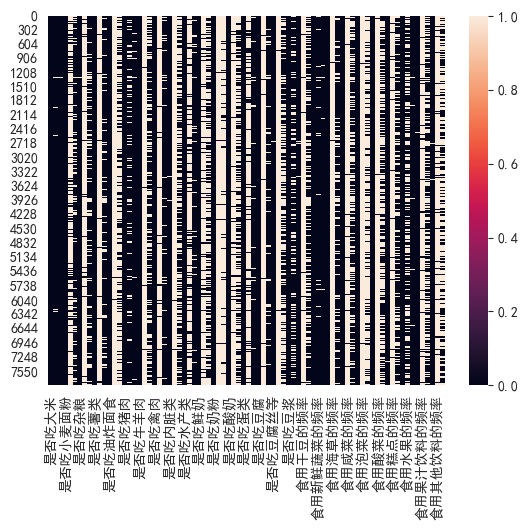

In [90]:
sns.heatmap(data1.isnull())
plt.savefig('output.png', dpi=2500, bbox_inches='tight')  #将图片保存到磁盘

ValueError: Mask must have the same shape as data.

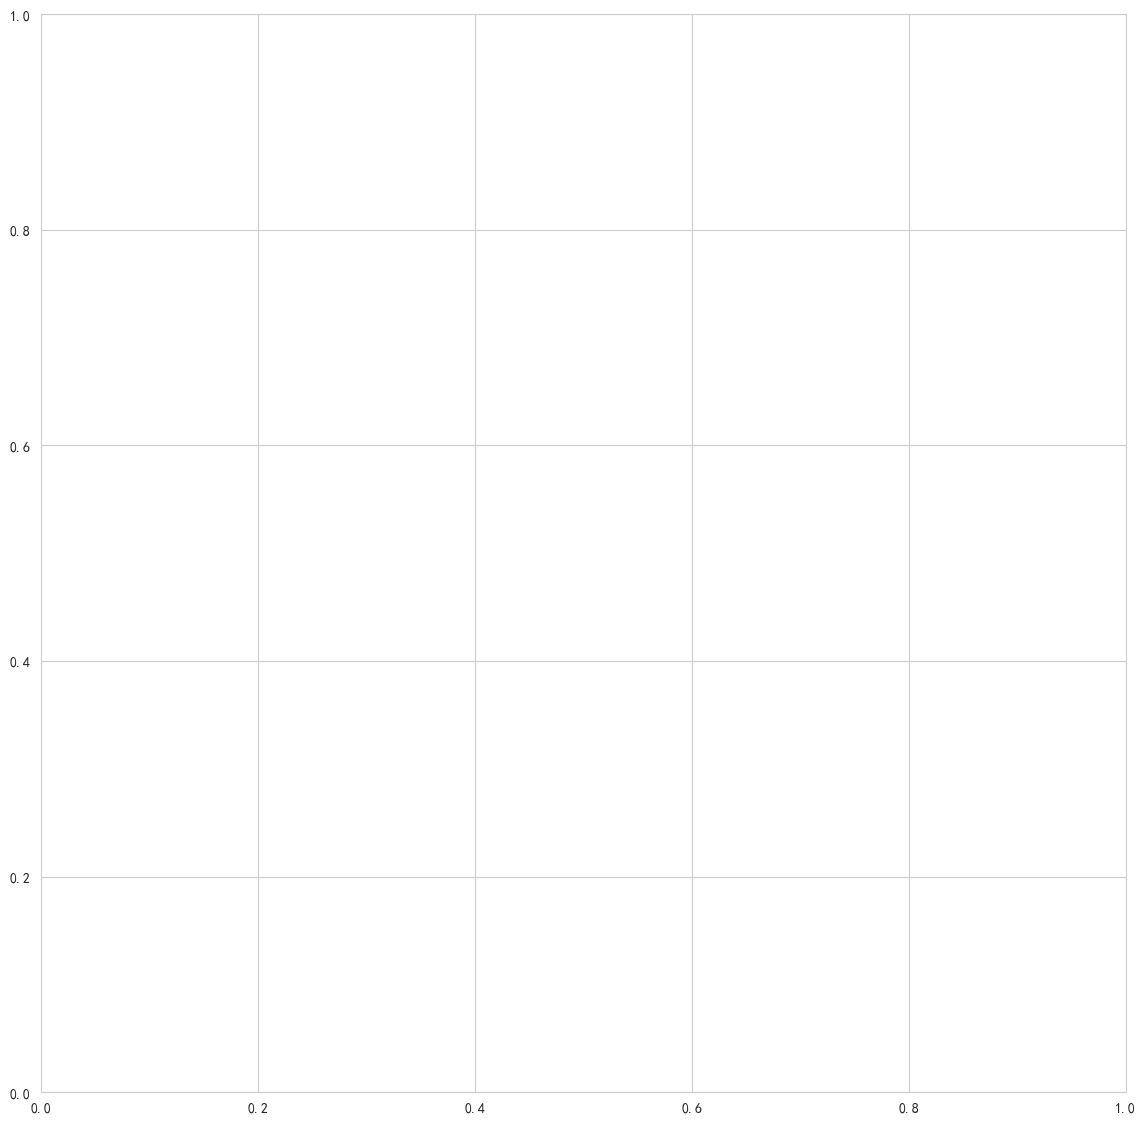

In [88]:
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (14,14))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sns.heatmap(data1.isnull(), 
#             annot=True,
            mask=mask,
            linewidths=.9, 
            linecolor='white',
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r" 
            fmt='.2f',
            square=True,
           cbar=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);
plt.savefig('output.png', dpi=2500, bbox_inches='tight')  #将图片保存到磁盘

In [50]:
data2=data1.describe()

In [51]:
data2.to_excel('饮食describe.xlsx',index=False)

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7835 entries, 0 to 7834
Data columns (total 87 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   是否吃大米        7831 non-null   float64
 1   食用大米的频率      7665 non-null   float64
 2   大米平均每次食用量    7808 non-null   float64
 3   是否吃小麦面粉      7817 non-null   float64
 4   食用小麦面粉的频率    1397 non-null   float64
 5   小麦面粉平均每次食用量  6431 non-null   float64
 6   是否吃杂粮        7821 non-null   float64
 7   食用杂粮的频率      277 non-null    float64
 8   杂粮平均每次食用量    6066 non-null   float64
 9   是否吃薯类        7829 non-null   float64
 10  食用薯类的频率      173 non-null    float64
 11  薯类平均每次食用量    6622 non-null   float64
 12  是否吃油炸面食      7833 non-null   float64
 13  食用油炸面食的频率    67 non-null     float64
 14  油炸面食平均每次食用量  2688 non-null   float64
 15  是否吃猪肉        7829 non-null   float64
 16  食用猪肉的频率      6220 non-null   float64
 17  猪肉平均每次食用量    7656 non-null   float64
 18  是否吃牛羊肉       7827 non-null   float64
 19  食用牛羊肉的

In [68]:
# Import library for VIF (方差扩大因子)
data3=data[['是否吃大米','食用大米的频率','大米平均每次食用量',
'是否吃小麦面粉', '食用小麦面粉的频率', '小麦面粉平均每次食用量',
'是否吃杂粮' ,
   '食用杂粮的频率',      
   '杂粮平均每次食用量',    
   '是否吃薯类',        
   '食用薯类的频率',    
   '薯类平均每次食用量',  
   '是否吃油炸面食' ,    
   '食用油炸面食的频率' ,  
   '油炸面食平均每次食用量' ,
   '是否吃猪肉' ,      
   '食用猪肉的频率',     
   '猪肉平均每次食用量',  
   '是否吃牛羊肉' ,     
   '食用牛羊肉的频率',    
   '牛羊肉平均每次食用量',   
   '是否吃禽肉',       
  '食用禽肉的频率',    
   '禽肉平均每次食用量',   
   '是否吃内脏类',       
   '食用内脏的频率',    
   '内脏平均每次食用量',        
   '水产类平均每次食用量']] 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data10=pd.read_excel('output4.xlsx')
data10

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1983,2,4,1,9,3,0,0,0,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
1,1994,2,3,1,13,3,0,0,0,1,...,0.000000,2.0,0.000000,0.142857,0.000000,0.000000,0.571429,2.000000,0.428571,1.000000
2,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
3,1962,1,4,2,12,3,0,0,0,1,...,0.033333,2.0,0.033333,0.066667,0.066667,0.066667,0.033333,1.000000,0.066667,0.066667
4,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1974,2,4,2,10,3,0,0,0,2,...,0.142857,2.0,0.428571,0.000000,0.000000,0.066667,0.285714,1.000000,0.428571,0.285714
7831,1945,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.000000,0.285714,0.000000,0.142857,0.142857,2.000000,0.000000,0.000000
7832,1980,1,3,2,9,1,17,7,20,2,...,0.285714,2.0,0.285714,0.000000,0.142857,0.142857,0.000000,2.000000,0.285714,0.000000
7833,1965,2,3,2,10,3,0,0,0,1,...,0.285714,2.0,0.285714,0.142857,0.000000,0.000000,0.428571,2.000000,0.000000,0.000000


In [99]:
data11=data10[['是否吃大米', '食用大米的频率', '大米平均每次食用量', '是否吃小麦面粉', '食用小麦面粉的频率',
 '小麦面粉平均每次食用量', '是否吃杂粮', '食用杂粮的频率', '杂粮平均每次食用量', '是否吃薯类', 
 '食用薯类的频率', '薯类平均每次食用量', '是否吃油炸面食', '食用油炸面食的频率', '油炸面食平均每次食用量',
 '是否吃猪肉', '食用猪肉的频率', '猪肉平均每次食用量', '是否吃牛羊肉', '食用牛羊肉的频率', '牛羊肉平均每次食用量',
 '是否吃禽肉', '食用禽肉的频率', '禽肉平均每次食用量', '是否吃内脏类', '食用内脏的频率','内脏类平均每次食用量', '是否吃水产类',
 '食用水产的频率', '水产类平均每次食用量', '是否吃鲜奶', '食用鲜奶的频率', '鲜奶平均每次食用量', '是否吃奶粉', '食用奶粉的频率', 
 '奶粉平均每次食用量', '是否吃酸奶', '食用酸奶的频率', '酸奶平均每次食用量', '是否吃蛋类', '食用蛋类的频率', '蛋类平均每次食用量',
 '是否吃豆腐', '食用豆腐的频率', '豆腐平均每次食用量', '是否吃豆腐丝等', '食用豆腐丝等的频率', '豆腐丝平均每次食用量', '是否吃豆浆', 
 '豆浆平均每次食用量', '是否吃干豆', '食用干豆的频率', '干豆平均每次食用量', '是否吃新鲜蔬菜', '食用新鲜蔬菜的频率', 
 '新鲜蔬菜平均每次食用量', '是否吃海草类', '食用海草的频率', '海草类平均每次食用量', '是否吃咸菜', '食用咸菜的频率', '咸菜平均每次食用量',
 '是否吃泡菜', '食用泡菜的频率', '泡菜平均每次食用量', '是否吃酸菜', '食用酸菜的频率', '酸菜平均每次食用量', '是否吃糕点', '食用糕点的频率',
 '糕点平均每次食用量', '是否吃水果', '食用水果的频率', '水果平均每次食用量', '是否吃果汁饮料', '食用果汁饮料的频率', '果汁饮料平均每次食用量',
 '是否吃其他饮料', '食用其他饮料的频率', '其他饮料平均每次食用量', '植物油', '动物油', '盐', '酱油', '醋', '酱类', '味精']]

In [101]:
data12=data11.describe()
data12.to_excel('饮食describe.xlsx')